
<left>
    <img src="http://epecora.com.br/DataFiles/PPGOLD_PPGMNE.png" width="800" alt="PPGOLD Data Science: INTRO"  />
</left>

# *Data Science 2 - PPGOLD*


---


## PCA - Principal Component Analysis


#### Começamos importanto as bibliotecas básicas e fixando a semente aleatória

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(31415)

#### Usaremos o DataSet Breast Cancer do SKLEARN

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

<h4> Descrição do Data Set </h4>

In [3]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

<h4> Nomes das colunas das Variáveis Independentes</h4>

In [4]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


<h4> Nomes da Variável Dedependentes (resultado)</h4>

In [5]:
print(cancer['target_names'])

['malignant' 'benign']


In [6]:
print(cancer['filename'])

breast_cancer.csv


<h4> Transformando as Variáveis Dependentes em um DataFrame </h4>

In [7]:
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<h4> Notem que temos 30 colunas, mas a pergunta que não quer calar é precisamos de todas?</h4>

----

<h2> Principal Component Analysis </h2>
    
    Para o método da Análise das componentes principais é melhor normalizarmos os valores do DataFrame
    
    Após nós calcularemos as Duas componentes principais


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)

PCA(n_components=2)

<h4> Notem que os dados originais têm 30 colunas e após a PCA somente 2 colunas  </h4>

In [10]:
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(569, 30)
(569, 2)


<h4> Resultado Gráfico das duas componentes principais  </h4>

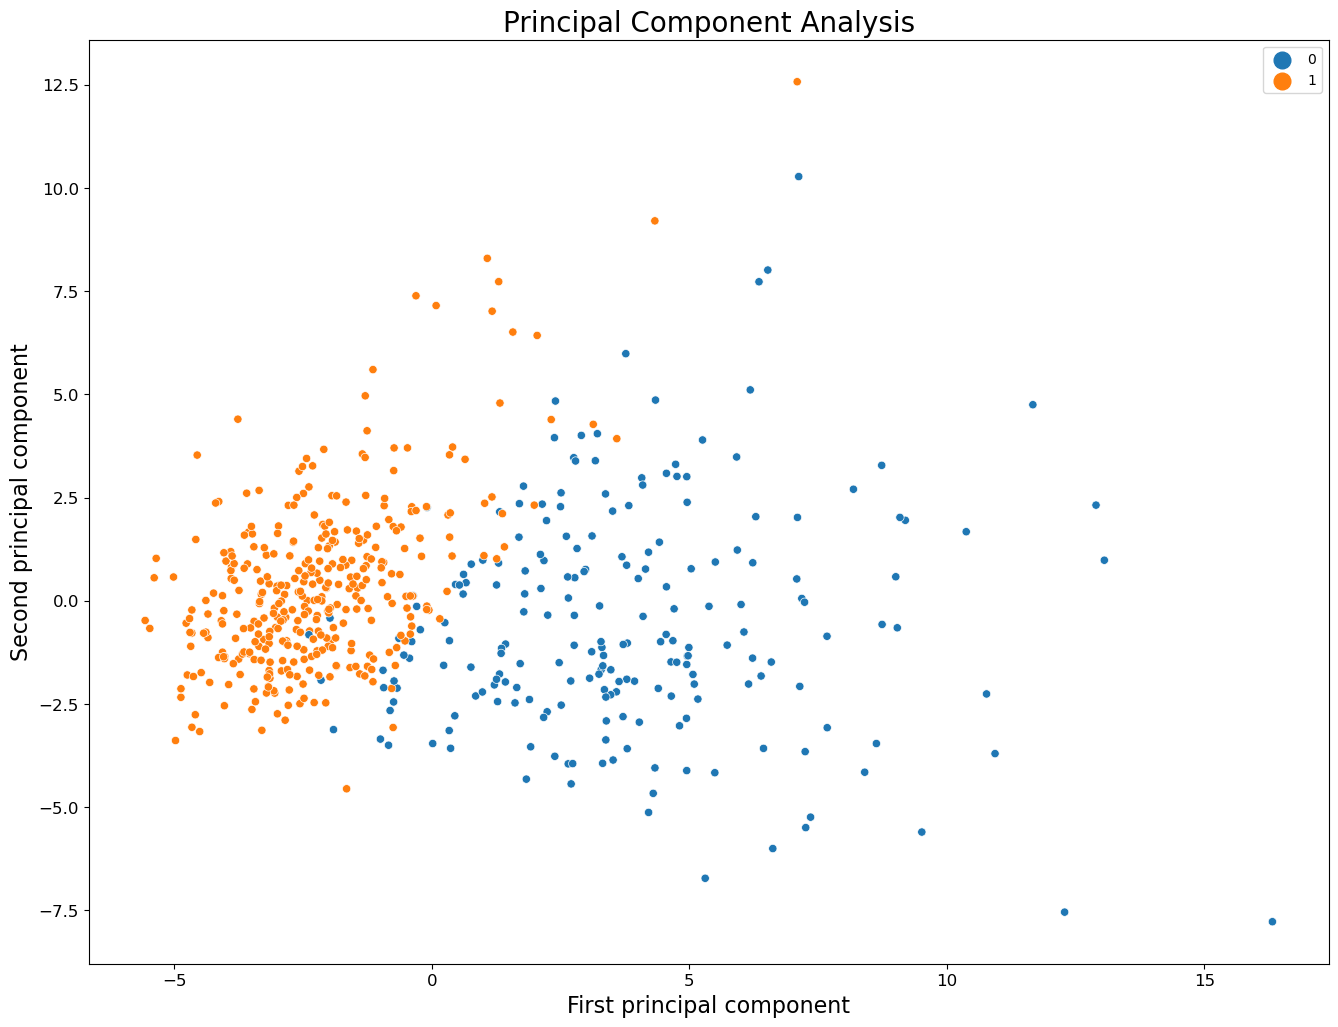

In [11]:
plt.figure(figsize=(16,12))

sns.scatterplot(x = x_pca[:,0], y = x_pca[:,1], hue = cancer['target'])
plt.tick_params(labelsize=12)
plt.title("Principal Component Analysis", size = 20)
plt.xlabel('First principal component', size = 16)
plt.ylabel('Second principal component', size = 16)
plt.legend(markerscale=2)


<h4> Valores das duas PCA, notem que as PCA não têm um significado prático, visto que são uma combinação linear das colunas originais  </h4>

In [12]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

<Axes: >

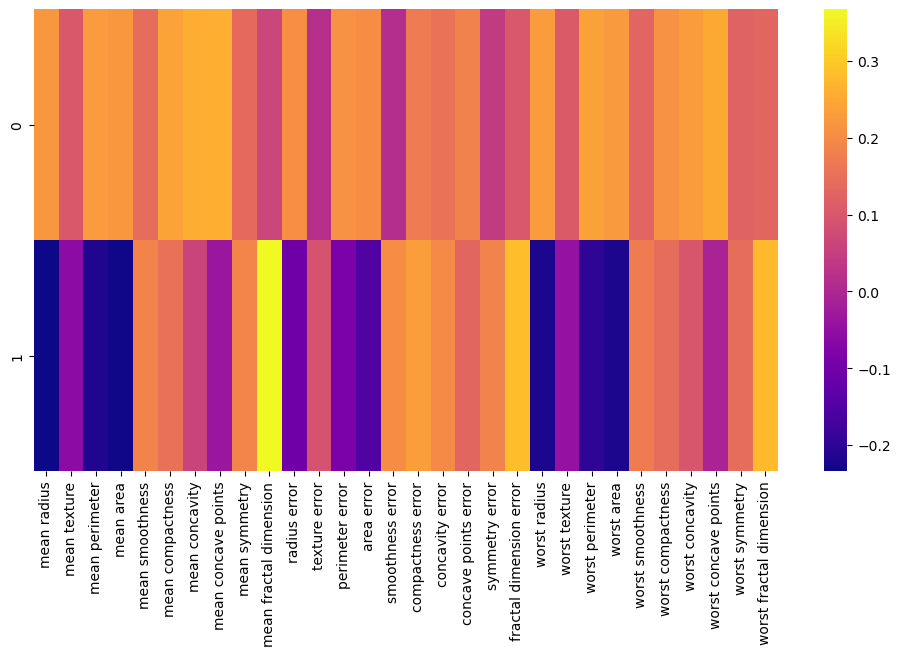

In [13]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])
plt.figure(figsize = (12,6))
sns.heatmap(df_comp, cmap="plasma")

<h2> Quantas PCAS usaremos ? </h2>

(569, 29)
[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05]
['PC01', 'PC02', 'PC03', 'PC04', 'PC05', 'PC06', 'PC07', 'PC08', 'PC09', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29']


/Users/pecorajr/anaconda3/envs/ppgold/lib/python3.12/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


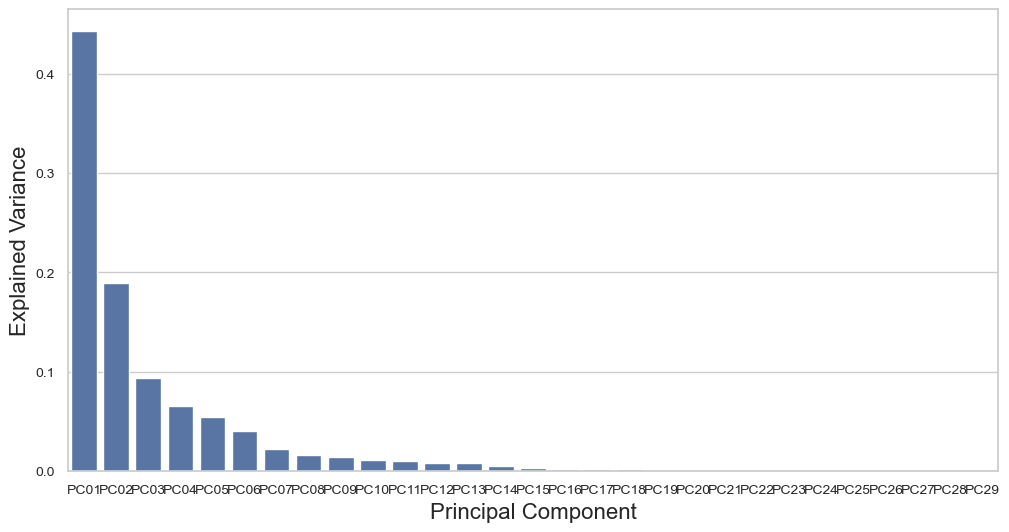

In [14]:
nPCA = 29

pcaAll = PCA(n_components = nPCA)
pcaAll.fit(scaled_data)
x_pca_All = pcaAll.transform(scaled_data)
print(x_pca_All.shape)
print(pcaAll.explained_variance_ratio_)

pc_names= []

for i in range(nPCA):
    pc_names.append("PC%0.2d" % (i+1))
    
print(pc_names)
    
    
sns.set_theme(style="whitegrid")
plt.figure(figsize = (12,6))
ax = sns.barplot(x=pc_names, y=pcaAll.explained_variance_ratio_, color='b')
plt.tick_params(labelsize=10)
plt.xlabel('Principal Component', size = 16)
plt.ylabel('Explained Variance', size = 16)
plt.show()

<h2> Sete parece um bom número, pois abaixo disso a variância explicada é muito baixa </h2>

In [15]:
nPCA = 7

pca10 = PCA(n_components = nPCA)
pca10.fit(scaled_data)
x_pca_10 = pca10.transform(scaled_data)
print(x_pca_10.shape)
#pca10.components_

(569, 7)


In [16]:
pca10.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 7,
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [17]:
pca10.explained_variance_

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324,
        1.20948224,  0.67640888])

In [18]:
pca10.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734])

In [19]:
pca10.singular_values_

array([86.93235745, 56.90677266, 40.04263937, 33.57058877, 30.62887007,
       26.2104161 , 19.60102663])

In [20]:
pca10.mean_

array([-3.16286735e-15, -6.53060890e-15, -7.07889127e-16, -8.79983452e-16,
        6.13217737e-15, -1.12036918e-15, -4.42138027e-16,  9.73249991e-16,
       -1.97167024e-15, -1.45363120e-15, -9.07641468e-16, -8.85349205e-16,
        1.77367396e-15, -8.29155139e-16, -7.54180940e-16, -3.92187747e-16,
        7.91789988e-16, -2.73946068e-16, -3.10823423e-16, -3.36676596e-16,
       -2.33322442e-15,  1.76367415e-15, -1.19802625e-15,  5.04966114e-16,
       -5.21317026e-15, -2.17478837e-15,  6.85645643e-16, -1.41265636e-16,
       -2.28956670e-15,  2.57517109e-15])

['PC01', 'PC02', 'PC03', 'PC04', 'PC05', 'PC06', 'PC07']


/Users/pecorajr/anaconda3/envs/ppgold/lib/python3.12/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


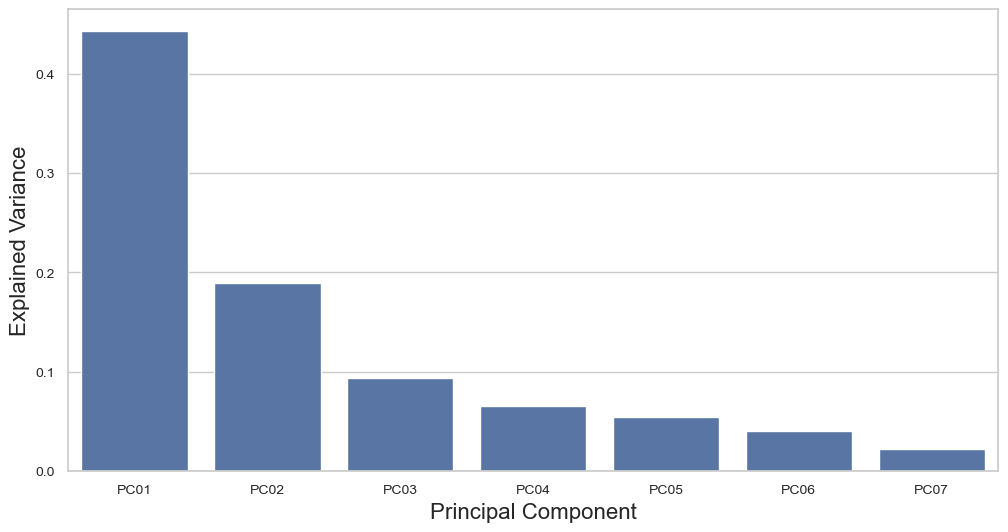

In [21]:
pc_names= []

for i in range(nPCA):
    pc_names.append("PC%.2d" % (i+1))
    
print(pc_names)
    
sns.set_theme(style="whitegrid")
plt.figure(figsize = (12,6))
ax = sns.barplot(x=pc_names, y=pca10.explained_variance_ratio_, color='b')
plt.tick_params(labelsize=10)
plt.xlabel('Principal Component', size = 16)
plt.ylabel('Explained Variance', size = 16)
plt.show()


In [23]:
x_pca_10 = pca10.transform(scaled_data)
df_pca = pd.DataFrame(x_pca_10, columns = pc_names)

print(df_pca.shape)

df_pca.head()

(569, 7)


,PC01,PC02,PC03,PC04,PC05,PC06,PC07
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159369
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429912
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936212


In [24]:
df_all = pd.concat([df, df_pca], axis=1)
print(df_all.shape)
df_all.head()

(569, 37)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst concave points,worst symmetry,worst fractal dimension,PC01,PC02,PC03,PC04,PC05,PC06,PC07
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.2654,0.4601,0.11890,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159369
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1860,0.2750,0.08902,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.2430,0.3613,0.08758,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.2575,0.6638,0.17300,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429912
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.1625,0.2364,0.07678,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936212


<h2> Random Forests com e sem a PCA </h2>

Primeiro separaremos o nosso DataSet em Treino e Teste, notem que eu juntei os DataSets original e da PCA para que o "SPLIT" seja o mesmo para os dois. Após o SPLIT eu separo as variáveis independentes em Originais e PCA novamente.

In [25]:
from sklearn.model_selection import train_test_split # Import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(df_all, cancer['target'], test_size=0.3) # 70% training and 30% test


X_train_ori = X_train.iloc[:, 0:30]
X_train_pca = X_train.iloc[:,30:(30+nPCA)]

X_test_ori = X_test.iloc[:, 0:30]
X_test_pca = X_test.iloc[:,30:(30+nPCA)]

<h2> Random Forests com os dados Originais </h2>

Accuracy: 0.9766081871345029
[[68  3]
 [ 1 99]]
Time:  0.7169370420160703


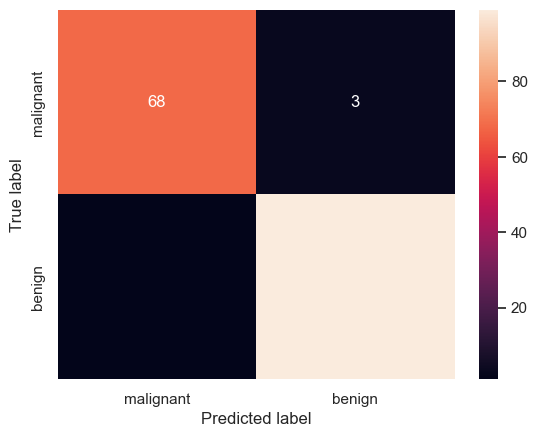

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import timeit

start = timeit.default_timer()

rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train_ori,y_train)

y_pred_ori = rfc.predict(X_test_ori)

print("Accuracy:",accuracy_score(y_test, y_pred_ori))

cf_Matrix = confusion_matrix(y_test, y_pred_ori)

sns.heatmap(cf_Matrix, annot=True, xticklabels = ['malignant', 'benign'], yticklabels = ['malignant' ,'benign'])
plt.ylabel('True label')
plt.xlabel('Predicted label')

print(cf_Matrix)
stop = timeit.default_timer()

print('Time: ', stop - start)  

<h2> Random Forests com PCA </h2>

Accuracy: 0.9590643274853801
[[66  5]
 [ 2 98]]
Time:  0.5683167910028715


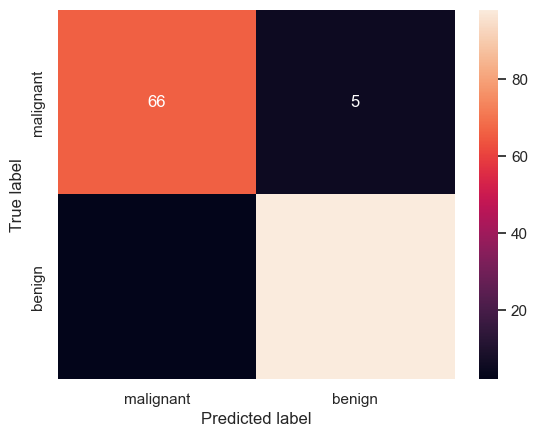

In [32]:
start = timeit.default_timer()

rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train_pca,y_train)

y_pred_pca = rfc.predict(X_test_pca)

print("Accuracy:",accuracy_score(y_test, y_pred_pca))

cf_Matrix = confusion_matrix(y_test, y_pred_pca)

sns.heatmap(cf_Matrix, annot=True, xticklabels = ['malignant', 'benign'], yticklabels = ['malignant', 'benign'])
plt.ylabel('True label')
plt.xlabel('Predicted label')

print(cf_Matrix)
stop = timeit.default_timer()

print('Time: ', stop - start)  

## Bibliografia

[1] https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

[2] https://scikit-learn.org/stable/modules/cross_validation.html

[3] https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

[5] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## Autor

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 24-10-2021       | 1.0     | Eduardo Pecora    | Criação               |

<hr>

